Вариант 21

In [1]:
from Bio import SeqIO
from scipy import stats
from scipy.stats import planck
from scipy.stats import zipf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
fasta_sequence = []
with open('./data5/GCF_000242935.2_ASM24293v3_genomic.fna') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        fasta_sequence.append(record.seq)

fasta_sequence = fasta_sequence[0]

start = None
intervals = []
for i in range(len(fasta_sequence)):
    if fasta_sequence[i] == 'T':
        if start == None:
            start = i
        else:
            intervals.append(i - start - 1)
            start = i

Пуассоновское распределение

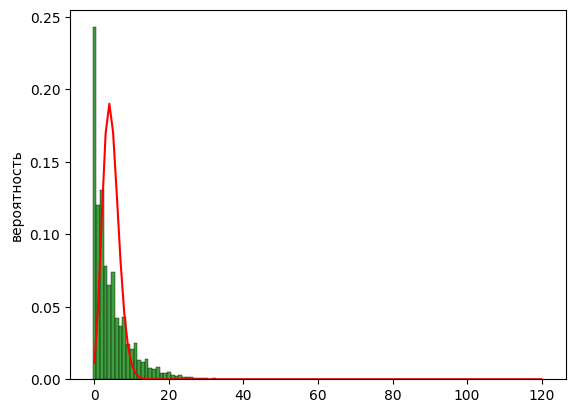

Среднее значение логарифма правдоподобия -4.09


In [3]:
sample = np.array(intervals)
mu = sample.mean()
sns.histplot(sample, stat='density', discrete=True, color='green')
plt.ylabel('вероятность')
T=range(max(sample)+1)
plt.plot(T, stats.poisson.pmf(T,mu), color='red')
plt.show()
u=sum(stats.poisson.logpmf(sample, mu))/len(sample)
print('Среднее значение логарифма правдоподобия {:.3}'.format(u))

Планковское распределение

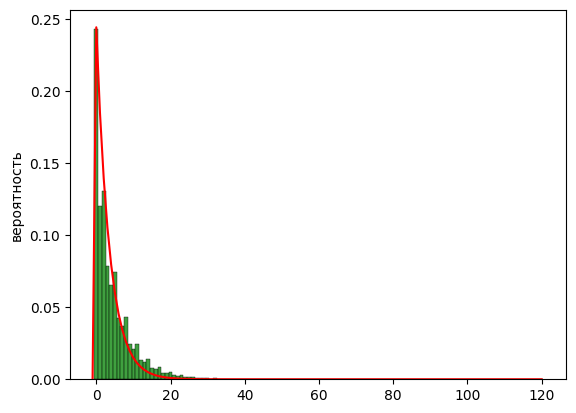

Среднее значение логарифма правдоподобия -3.23


In [10]:
sample = np.array(intervals)
a = 0.28
sns.histplot(sample, stat='density', discrete=True, color='green')
plt.ylabel('вероятность')
T=range(min(sample)-1,max(sample)+1)
plt.plot(T,stats.planck.pmf(T,a), color='red')
plt.show()
u=sum(stats.dlaplace.logpmf(sample, a))/len(sample)
print('Среднее значение логарифма правдоподобия {:.3}'.format(u))

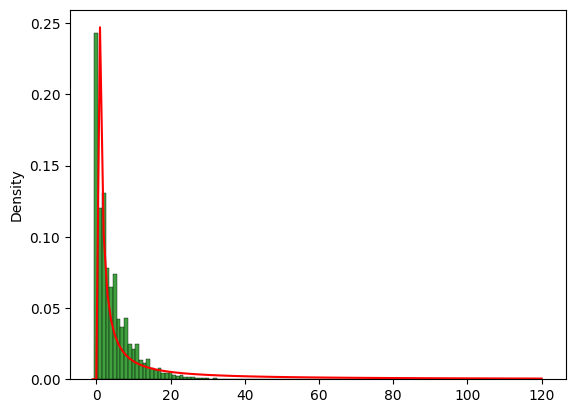

Среднее значение логарифма правдоподобия -inf


In [14]:
a = 1.29
sample = np.array(intervals)
sns.histplot(sample, stat='density', discrete=True, color='green')
T=range(sample.min()-1, sample.max()+1)
plt.plot(T, stats.zipf.pmf(T, a), color='red')
plt.show()
u=sum(stats.zipf.logpmf(sample, a))/len(sample)
print('Среднее значение логарифма правдоподобия {:.3}'.format(u))